In [1]:
#### This notebook explores the Brain Data from NYU and tests some of the common functions and utility functions

In [2]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt

In [3]:
file = '/mnt/4TB_pcie/fastBrain/multicoil_train/file_brain_AXFLAIR_202_6000581.h5'
hf = h5py.File(file)

In [6]:
print('Keys:', list(hf.keys()))
print('Attrs', dict(hf.attrs))

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_rss']
Attrs {'norm': 0.11359075695189698, 'max': 0.000938102468702127, 'patient_id': 'c377b12cb0c316338227f305e8683fed50b6a43f6d23a6a06a87b9f7b3124b0a', 'acquisition': 'AXFLAIR'}


In multi-coil MRIs, k-space has the following shape: (number of slices, number of coils, height, width)
For single-coil MRIs, k-space has the following shape: (number of slices, height, width)For single-coil MRIs, k-space has the following shape: (number of slices, height, width)

In [10]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print("The number of slices is: ", volume_kspace.shape[0])
print("The number of coils is: ", volume_kspace.shape[1])
print("The height of each slice is: ", volume_kspace.shape[2])
print("The width of each slice is: ", volume_kspace.shape[3])
print(volume_kspace.shape)

complex64
The number of slices is:  16
The number of coils is:  18
The height of each slice is:  512
The width of each slice is:  214
(16, 18, 512, 214)


In [12]:
slice_kspace = volume_kspace[10] # Choosing the 10-th slice of this volume


In [13]:
def show_slices(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

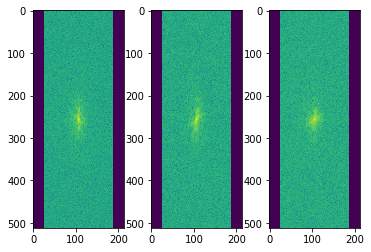

In [14]:
show_slices(np.log(np.abs(slice_kspace) + 1e-9), [0, 5, 10])  # This shows slices 0, 5 and 10

We can convert kspace to image space using some of the utility functions. These only work on PyTorch tensors, but to_tensor can convert numpy arrays to Torch tensors.


In [15]:
from data import transforms as T 

In [17]:
slice_kspace2 = T.to_tensor(slice_kspace)
slice_image = T.ifft2(slice_kspace2)             # Inverse Fourier Transform to get the complex image
slice_image_abs = T.complex_abs(slice_image)     # Compute absolute value to get the real image



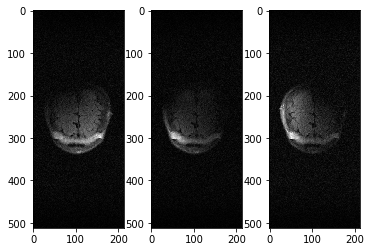

In [18]:
show_slices(slice_image_abs, [0,5,10], cmap='gray')

Each slice focuses on a different part of our volume. All these slices can be combined using the root sum of squares reconstruction.

In [19]:
slice_image_rss = T.root_sum_of_squares(slice_image_abs, dim=0)

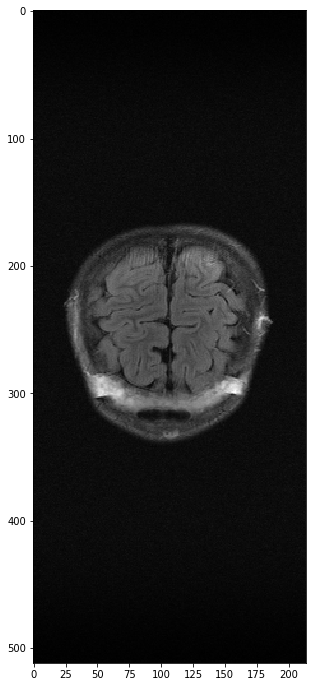

In [24]:
plt.figure(figsize = (12,12))
plt.imshow(np.abs(slice_image_rss.numpy()), cmap='gray')